# Bike Sharing Demand Prediction (Seoul City)

## Import the packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Dataset

In [2]:
data_path = '../data/raw/SeoulBikeData.csv'
dataset = pd. read_csv(data_path, encoding='unicode_escape')

In [3]:
dataset.head(10)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


In [4]:
dataset.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [5]:
dataset.shape

(8760, 14)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [7]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [8]:
dataset.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,01/12/2017,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760.0,NaN,NaN,NaN,704.602055,644.997468,0.0,191.0,504.5,1065.25,3556.0
Hour,8760.0,NaN,NaN,NaN,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
Temperature(°C),8760.0,NaN,NaN,NaN,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760.0,NaN,NaN,NaN,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
Wind speed (m/s),8760.0,NaN,NaN,NaN,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
Visibility (10m),8760.0,NaN,NaN,NaN,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature(°C),8760.0,NaN,NaN,NaN,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760.0,NaN,NaN,NaN,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8760.0,NaN,NaN,NaN,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0


In [9]:
print(dataset['Seasons'].unique())
print(dataset['Holiday'].unique())
print(dataset['Functioning Day'].unique())

['Winter' 'Spring' 'Summer' 'Autumn']
['No Holiday' 'Holiday']
['Yes' 'No']


## Data Preprocessing

In [10]:
dataset.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [11]:
dataset.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8755    False
8756    False
8757    False
8758    False
8759    False
Length: 8760, dtype: bool

## Feature Engineering
### Convert Date column to datetime format

In [12]:
dataset['Date'] = pd.to_datetime(dataset['Date'],format="%d/%m/%Y")

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [14]:
dataset.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [15]:
dataset.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,2018-11-30,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


### Convert the Date into Day, Month and Year

In [16]:
# Convert the Date into Day, Month and Year
dataset['Week Days'] = dataset['Date'].dt.weekday
dataset['Day'] = dataset['Date'].dt.day
dataset['Month'] = dataset['Date'].dt.month
dataset['Year'] = dataset['Date'].dt.year

# Drop the Date filed
dataset.drop('Date',axis=1, inplace=True)

In [17]:
dataset.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Week Days,Day,Month,Year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,4,1,12,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,4,1,12,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,4,1,12,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,4,1,12,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,4,1,12,2017


In [18]:
dataset.tail()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Week Days,Day,Month,Year
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,4,30,11,2018
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,4,30,11,2018
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,4,30,11,2018
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,4,30,11,2018
8759,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,4,30,11,2018


## EDA

### Hours vs Rented Bike Count

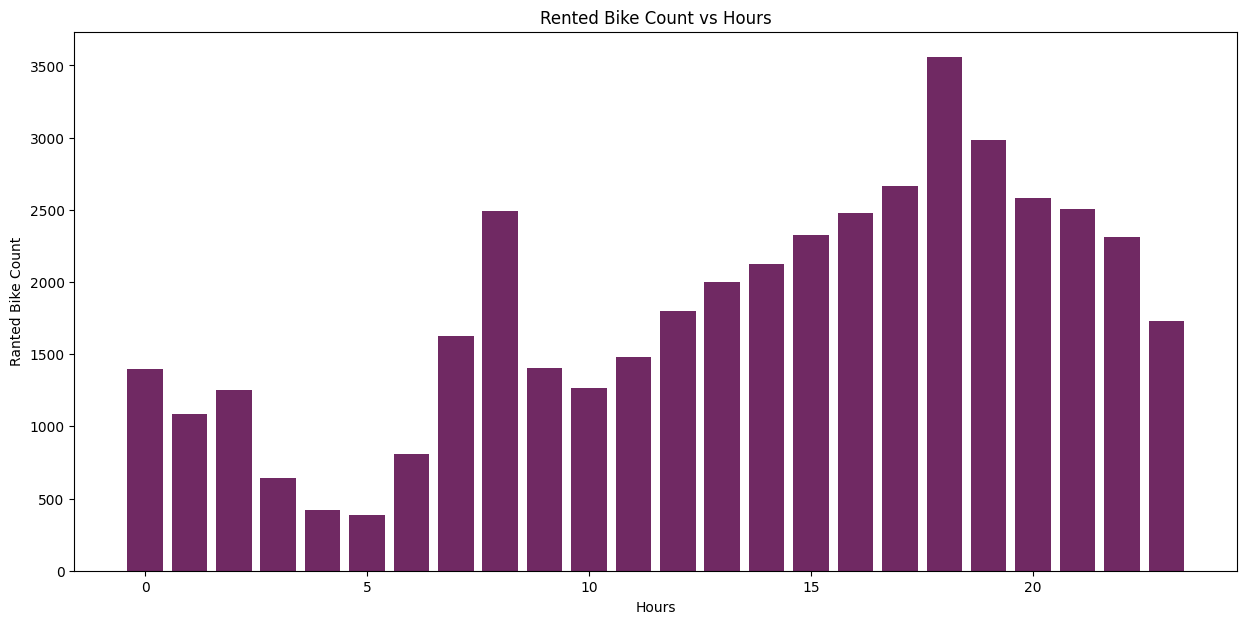

In [19]:
plt.figure(figsize=(15,7))
plt.bar(dataset['Hour'], dataset['Rented Bike Count'], color = '#702963', data = dataset)
plt.title('Rented Bike Count vs Hours')
plt.xlabel('Hours')
plt.ylabel('Ranted Bike Count')
plt.show()

#### Insights
##### Starting of the day at 5 o'clock to around 7 o'clock we can a moderate rise in the rented bike counts. After that, at 8 o'clock we can see a peak of aprroximetely 2500 bike per hours. Mean while it it countinous to grows slowly as the days goes by. It is intresting to note that we see highest peak for the rente bike at 6 o'clock in the evening near 3500 bikes per hours.
##### So, we have to keep ready our bike from morning 6 to evening 6, and rest of the other time of the day we can schedule service of bikes.

### Days vs Rented Bike Count

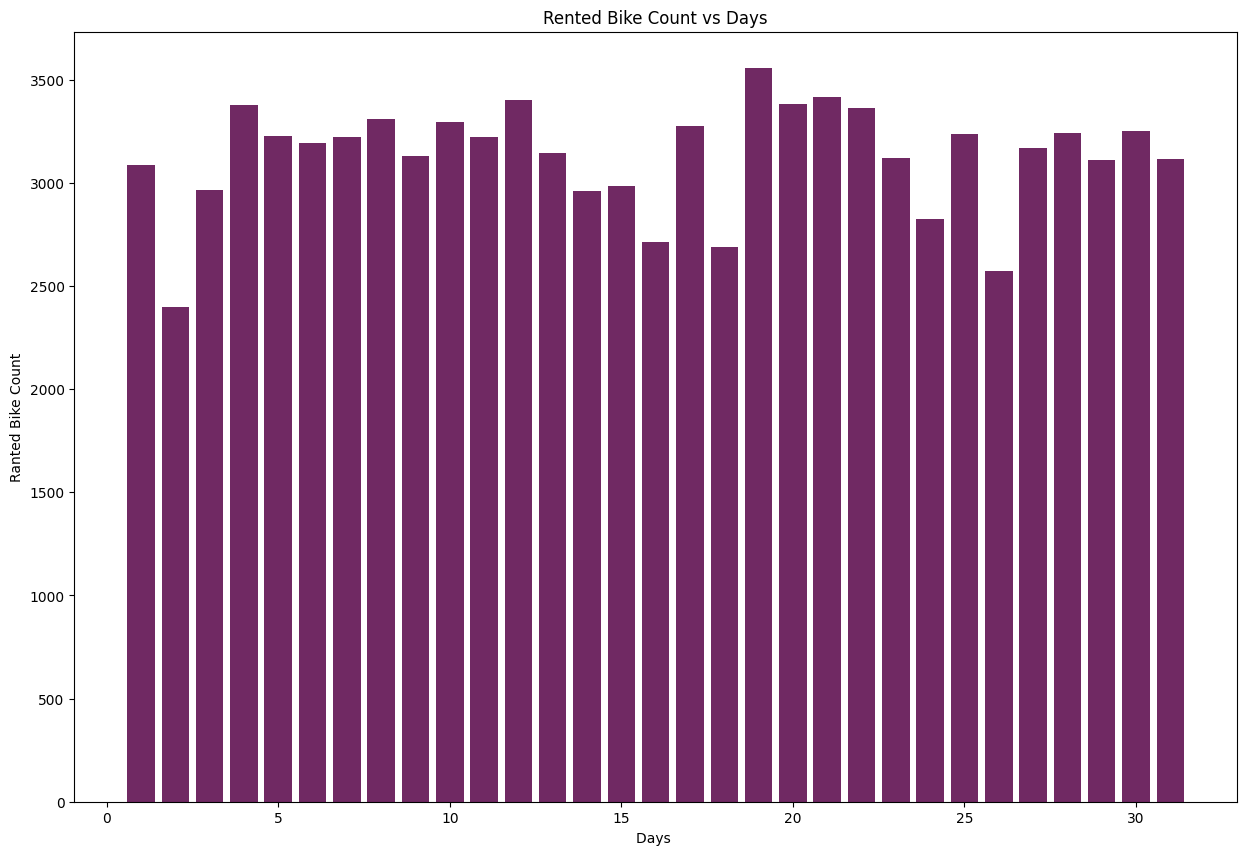

In [20]:
plt.figure(figsize=(15,10))
plt.bar(dataset['Day'], dataset['Rented Bike Count'], color = '#702963', data = dataset)
plt.title('Rented Bike Count vs Days')
plt.xlabel('Days ')
plt.ylabel('Ranted Bike Count')
plt.show()

#### Insights
##### According to the bar graph we can see that the number of bike needed each day is nearly same.

### Months vs Rented Bike Count

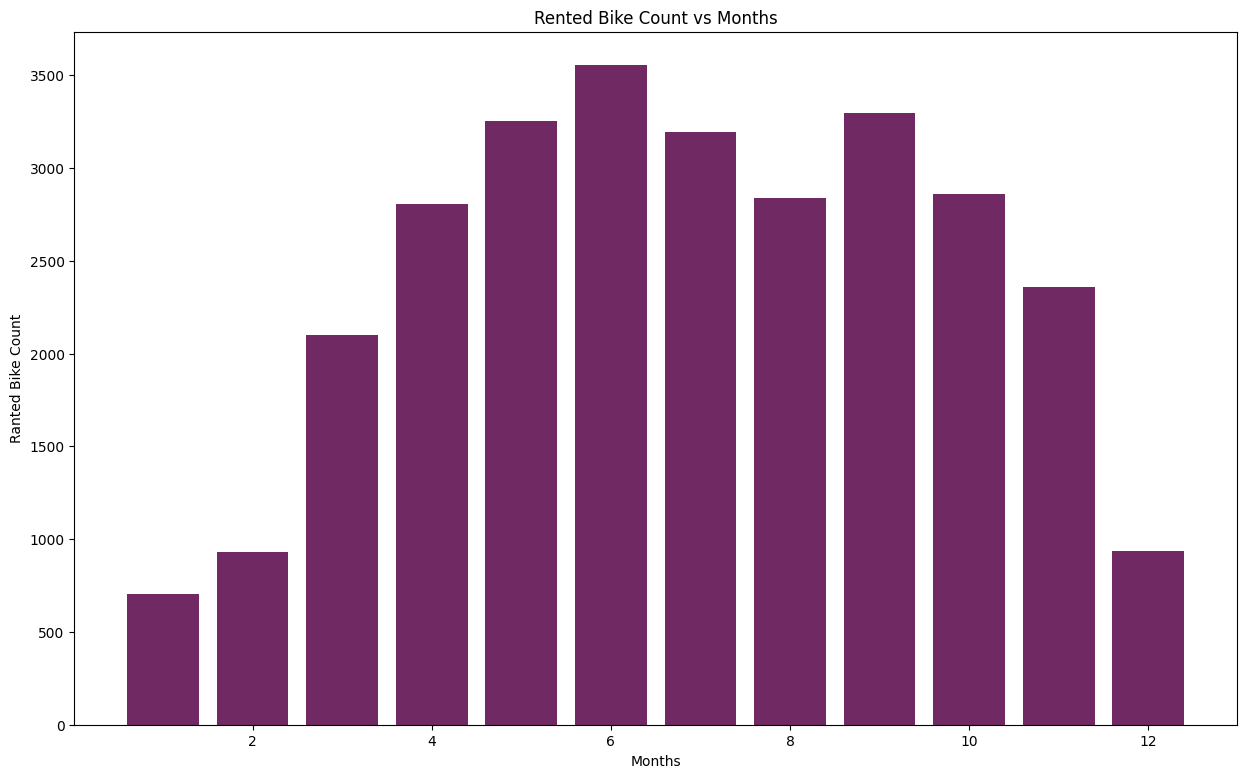

In [21]:
plt.figure(figsize=(15,9))
plt.bar(dataset['Month'], dataset['Rented Bike Count'], color = '#702963', data = dataset)
plt.title('Rented Bike Count vs Months')
plt.xlabel('Months')
plt.ylabel('Ranted Bike Count')
plt.show()

#### Insight:
##### We get to know that the most number of bikes are rented in the month of June.
##### Most bikes are rented in the Summer and Spring season.

### Week Days vs Rented Bike Count


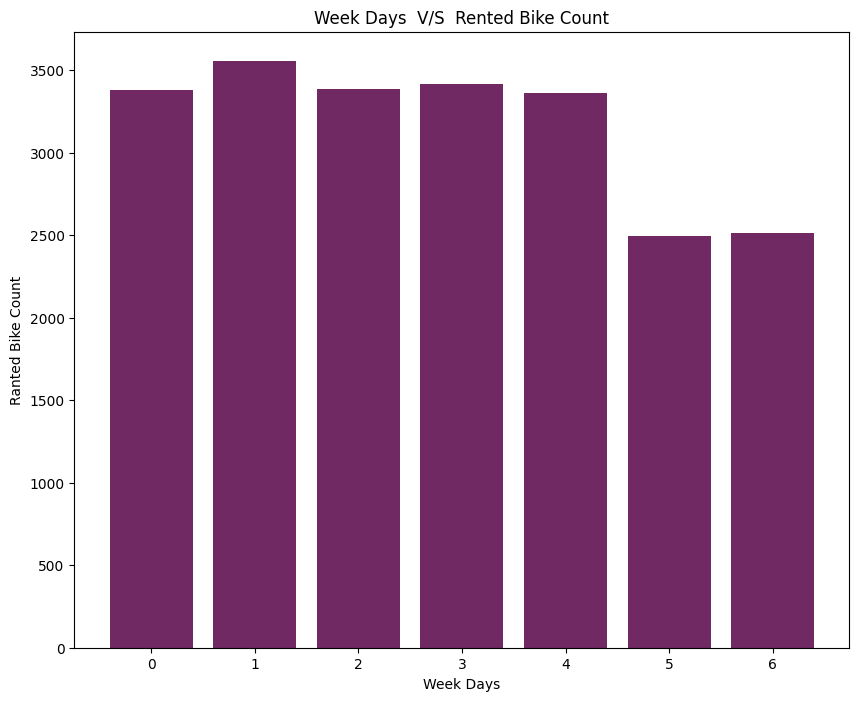

In [22]:
plt.figure(figsize=(10,8))
plt.bar(dataset['Week Days'], dataset['Rented Bike Count'], color = '#702963', data=dataset)
plt.title('Week Days  V/S  Rented Bike Count')
plt.xlabel('Week Days')
plt.ylabel('Ranted Bike Count')
plt.show()

#### Insights:
##### The bikes are rented on the weekdays more. Hence, we can say most of people use rented bike for office, school and work.
##### It is interesting to see that the number of bikes rented on Weekends remain almost same.

### Holiday vs Rented Bike Count

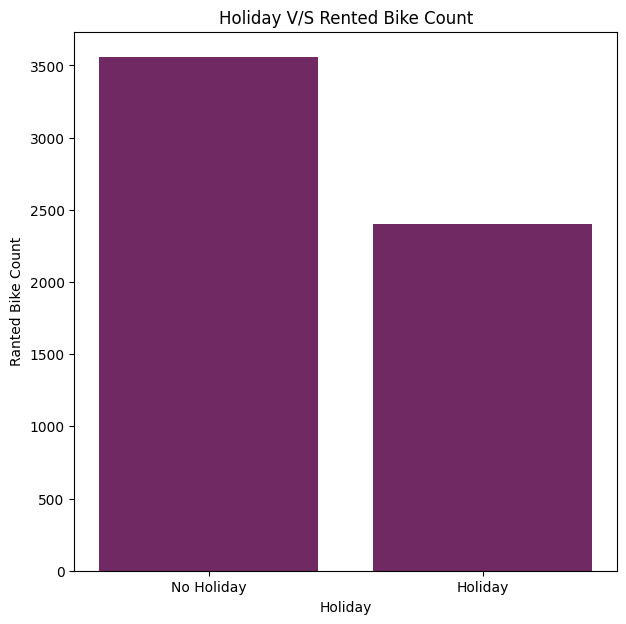

In [23]:
plt.figure(figsize=(7,7))
plt.bar(dataset['Holiday'], dataset['Rented Bike Count'], color = '#702963', data=dataset)
plt.title('Holiday V/S Rented Bike Count')
plt.xlabel('Holiday')
plt.ylabel('Ranted Bike Count')
plt.show()

#### Insights:
##### The number of bikes rented on holidays are less than number of bikes rented on non holidays (regular days).

### Seasons vs Rented Bike Count

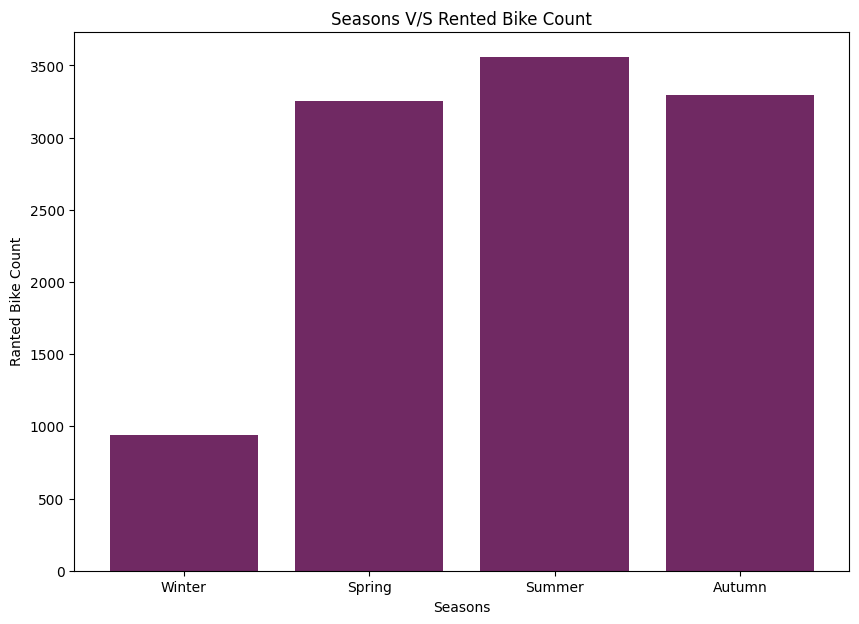

In [24]:
plt.figure(figsize=(10,7))
plt.bar(dataset['Seasons'], dataset['Rented Bike Count'], color = '#702963', data=dataset)
plt.title('Seasons V/S Rented Bike Count')
plt.xlabel('Seasons')
plt.ylabel('Ranted Bike Count')
plt.show()

#### Insights:
##### In the winter seasons number of bike rented count is less than any other seasons (Spring, Summer and Autumn). On the other hand, Ranted bike count are highest in the Summer Season.

### Histogram of Rented Bike Count

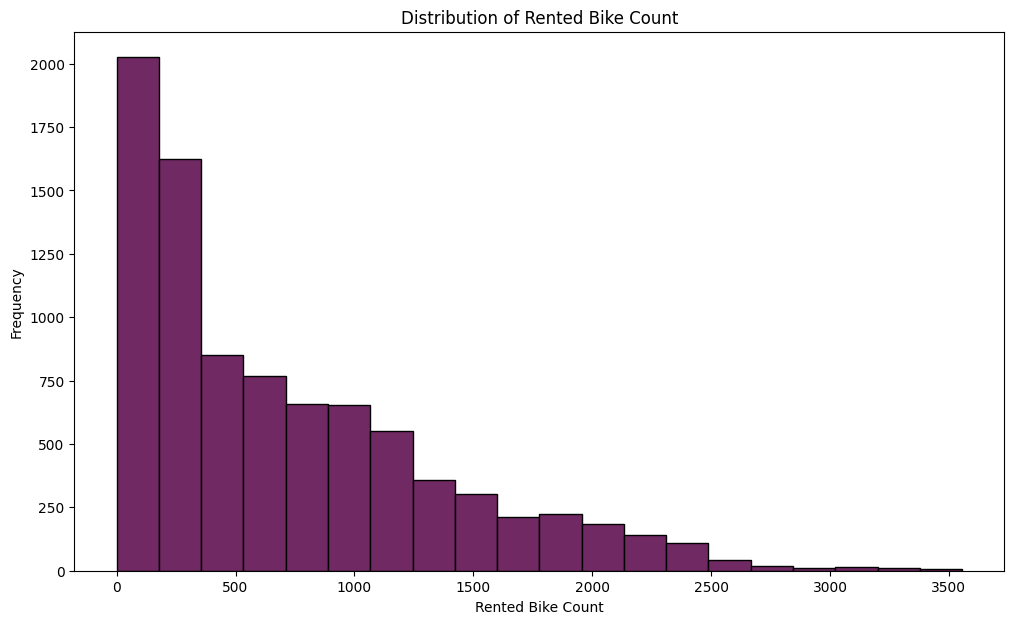

In [25]:
plt.figure(figsize=(12,7))
plt.hist(dataset['Rented Bike Count'], bins=20, color='#702963', edgecolor='black')
plt.title('Distribution of Rented Bike Count')
plt.xlabel('Rented Bike Count')
plt.ylabel('Frequency')
plt.show()

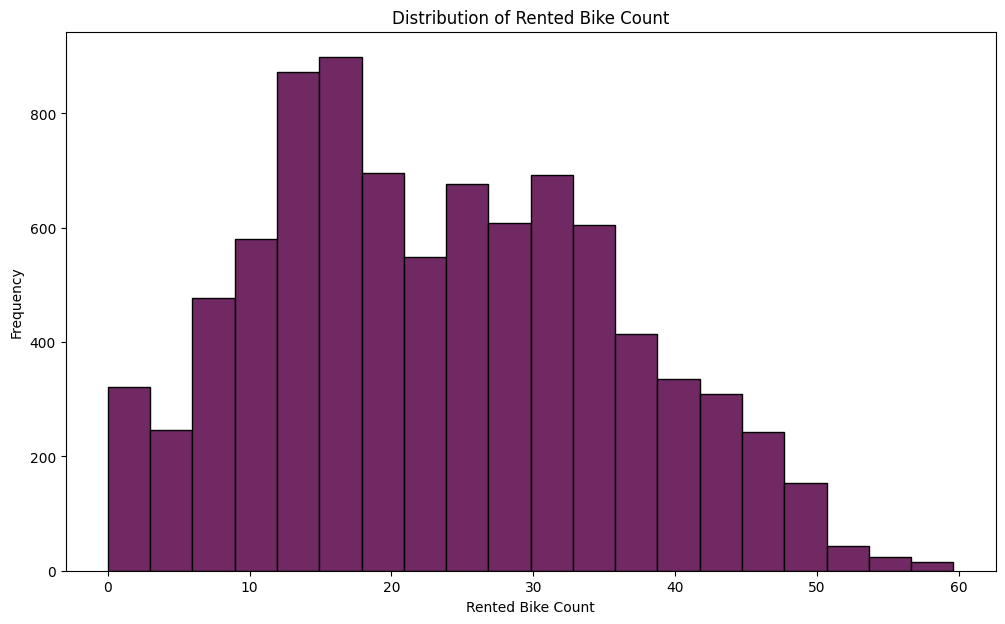

In [26]:
plt.figure(figsize=(12,7))
plt.hist(np.sqrt(dataset['Rented Bike Count']) , bins=20, color='#702963', edgecolor='black')
plt.title('Distribution of Rented Bike Count')
plt.xlabel('Rented Bike Count')
plt.ylabel('Frequency')
plt.show()

### Checking the correlation between features (Multicollinarity)

In [27]:
dataset.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Week Days,Day,Month,Year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,4,1,12,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,4,1,12,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,4,1,12,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,4,1,12,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,4,1,12,2017


In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  Week Days                  8760 non-null   int32

In [29]:
dataset_without_column = dataset.drop(columns=['Seasons', 'Holiday', 'Functioning Day'])
correlation_data = dataset_without_column.corr()

<Axes: >

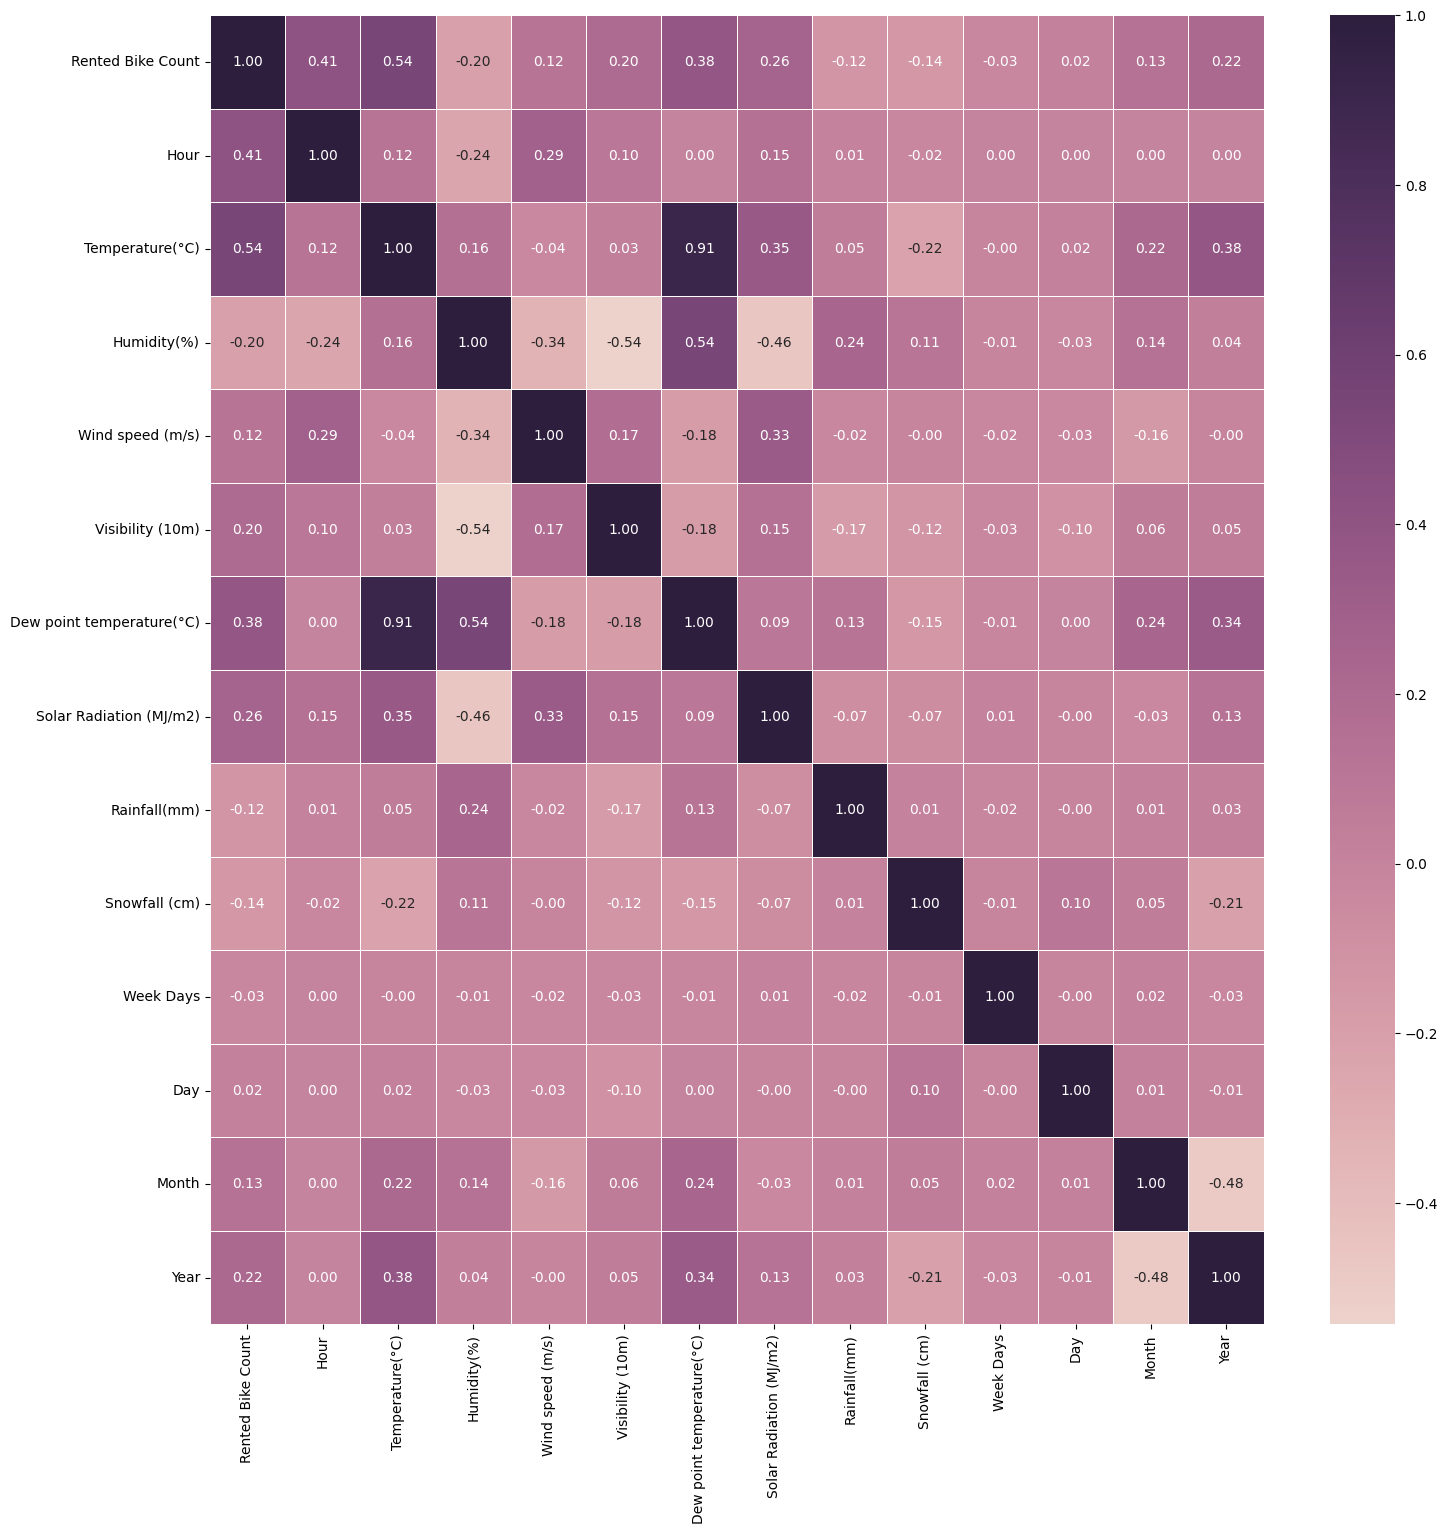

In [30]:
plt.figure(figsize=(17,17))
sns.heatmap(correlation_data, cmap= sns.cubehelix_palette(as_cmap = True), linewidths=0.7,annot=True, fmt= '.2f')

#### Insights:

##### The features that are highly co-related with our target variables are Temperature, Hours & Dew point temperature.
##### We can see that Temperature and Dew point temperature are highly co-related (0.91). 
##### It is highly recommended to drop columns that are highly co-related as they result in multicollinearity issue. So we drop column Dew point temperature. The reason is Dew point is 0.38 co-related with our target variable Rented Bike Counts which is less than Temperature.


### Remove Multicollinearity

In [31]:
# drop the Dew Point Temperature Column
dataset.drop(columns=['Dew point temperature(°C)'], inplace=True)

In [32]:
dataset.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday',
       'Functioning Day', 'Week Days', 'Day', 'Month', 'Year'],
      dtype='object')

### Finding trends in the dataset

<Axes: xlabel='Hour', ylabel='Rented Bike Count'>

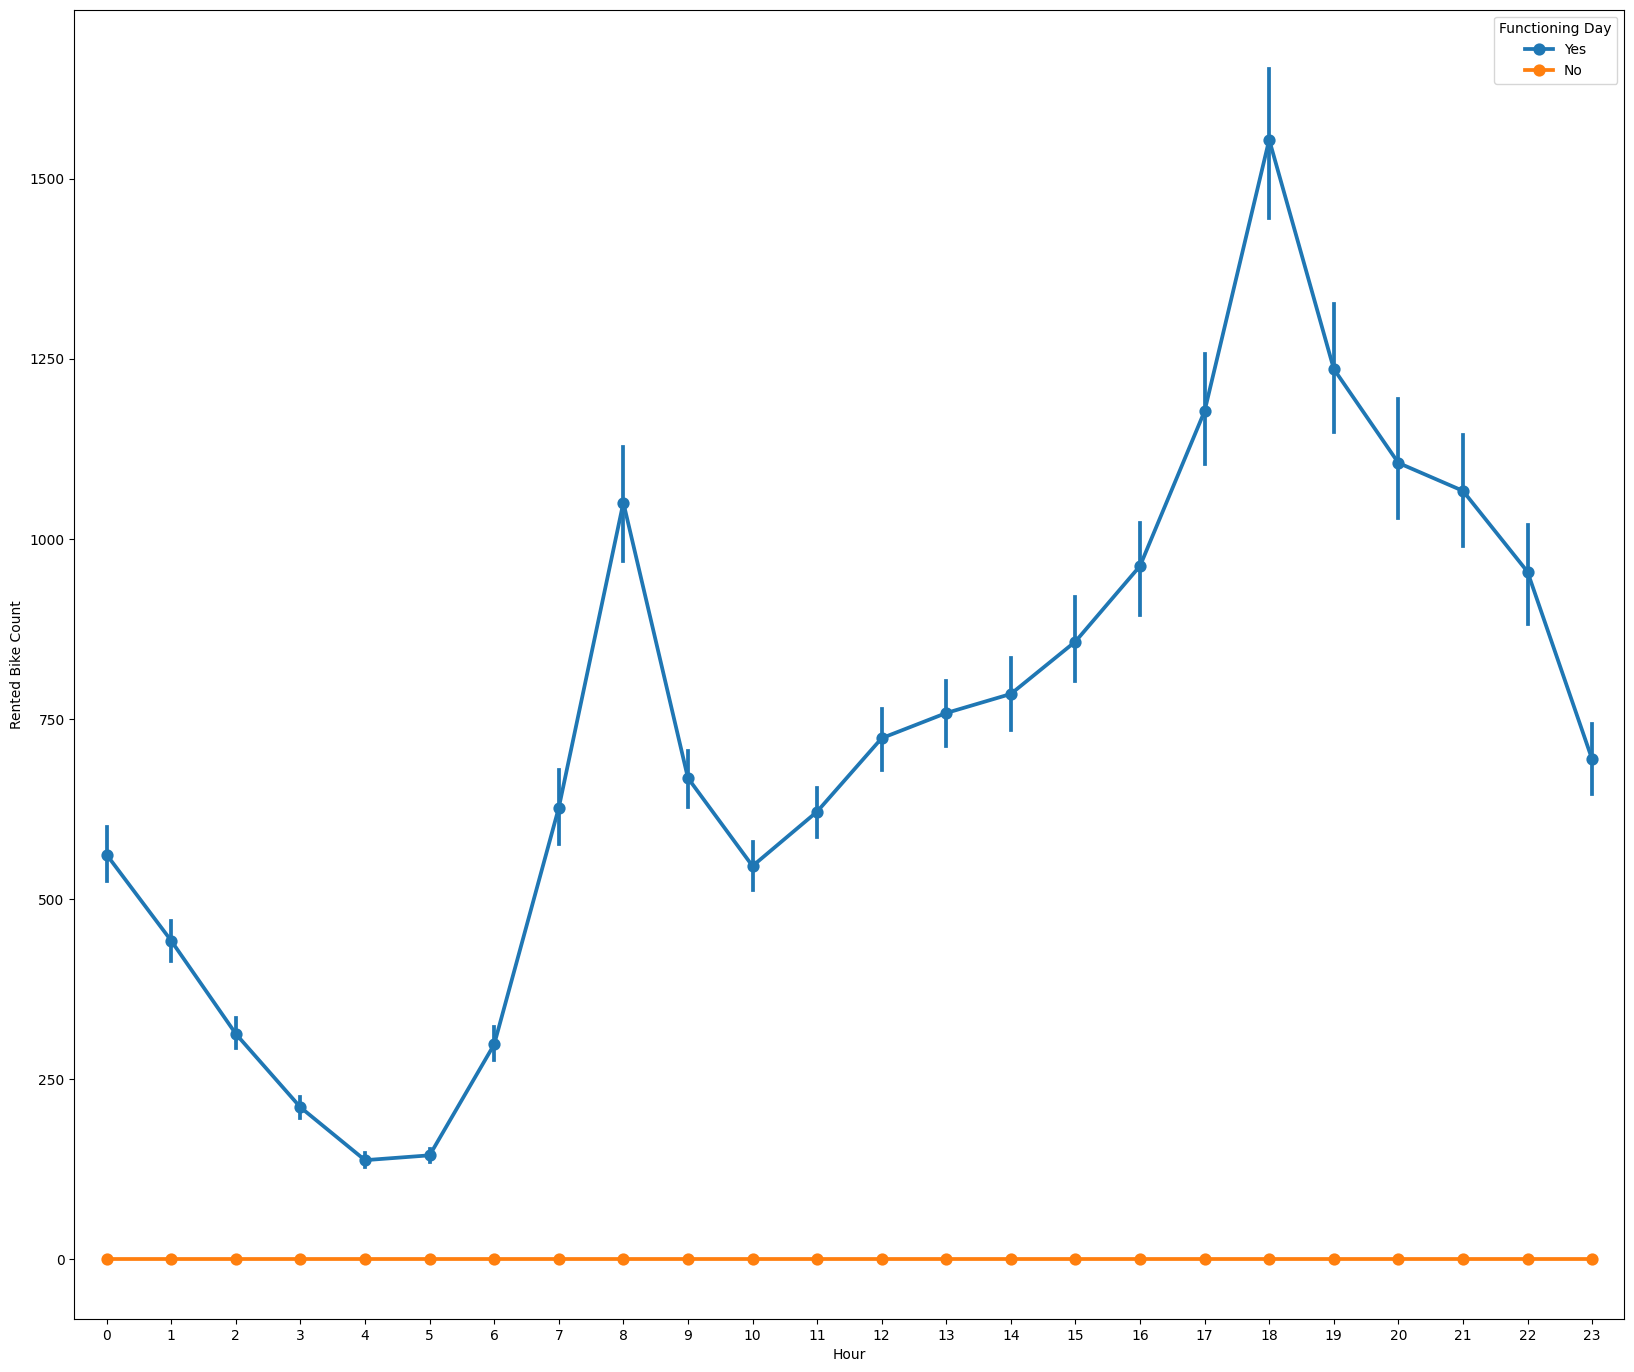

In [33]:
plt.figure(figsize=(20,17))
sns.pointplot(x = dataset['Hour'], y = dataset['Rented Bike Count'], hue=dataset['Functioning Day'])

#### Insights:
##### According to the graph we can see that during starting of the day at 5 O'clock number of bikes started to increase with the count of 125.
##### It kept increasing for 3 hours upto 8 O'clock and then went down for nearly 2 hours. 
##### During afternoon time the number of bikes  were fairly increasing. However it reached the peak during evening hour around 6 O'clock with the count of more than 1500 bikes. 
##### After that it continously decreased at night
##### On non functional day, no bikes were rented hence there is a straight line.

<Axes: xlabel='Hour', ylabel='Rented Bike Count'>

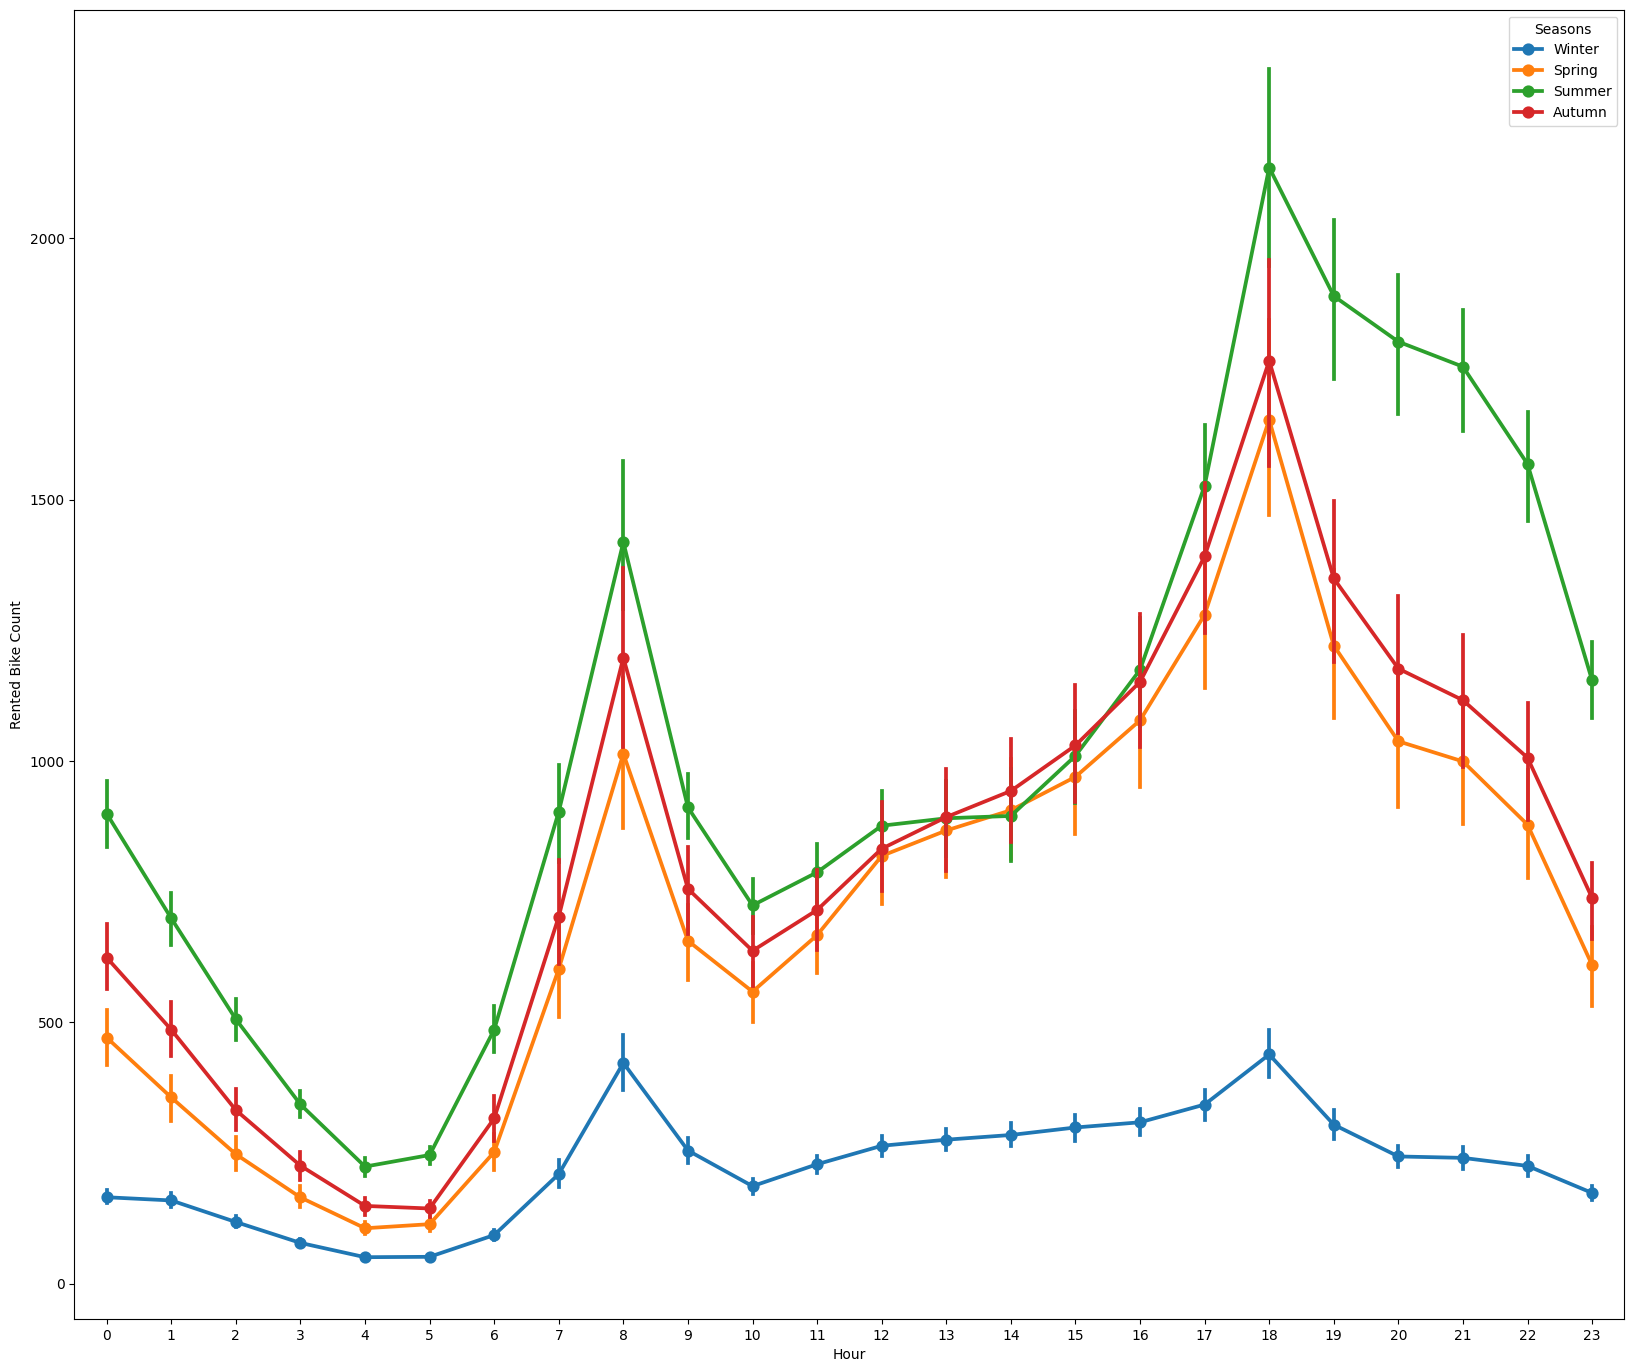

In [34]:
plt.figure(figsize=(20,17))
sns.pointplot(x = dataset['Hour'], y = dataset['Rented Bike Count'], hue = dataset['Seasons'])

#### Insights:
##### We can see that the trend of bike counts remains approximately same during all the seasons. However the count is much less for the winter season which is completely logical.

<Axes: xlabel='Hour', ylabel='Rented Bike Count'>

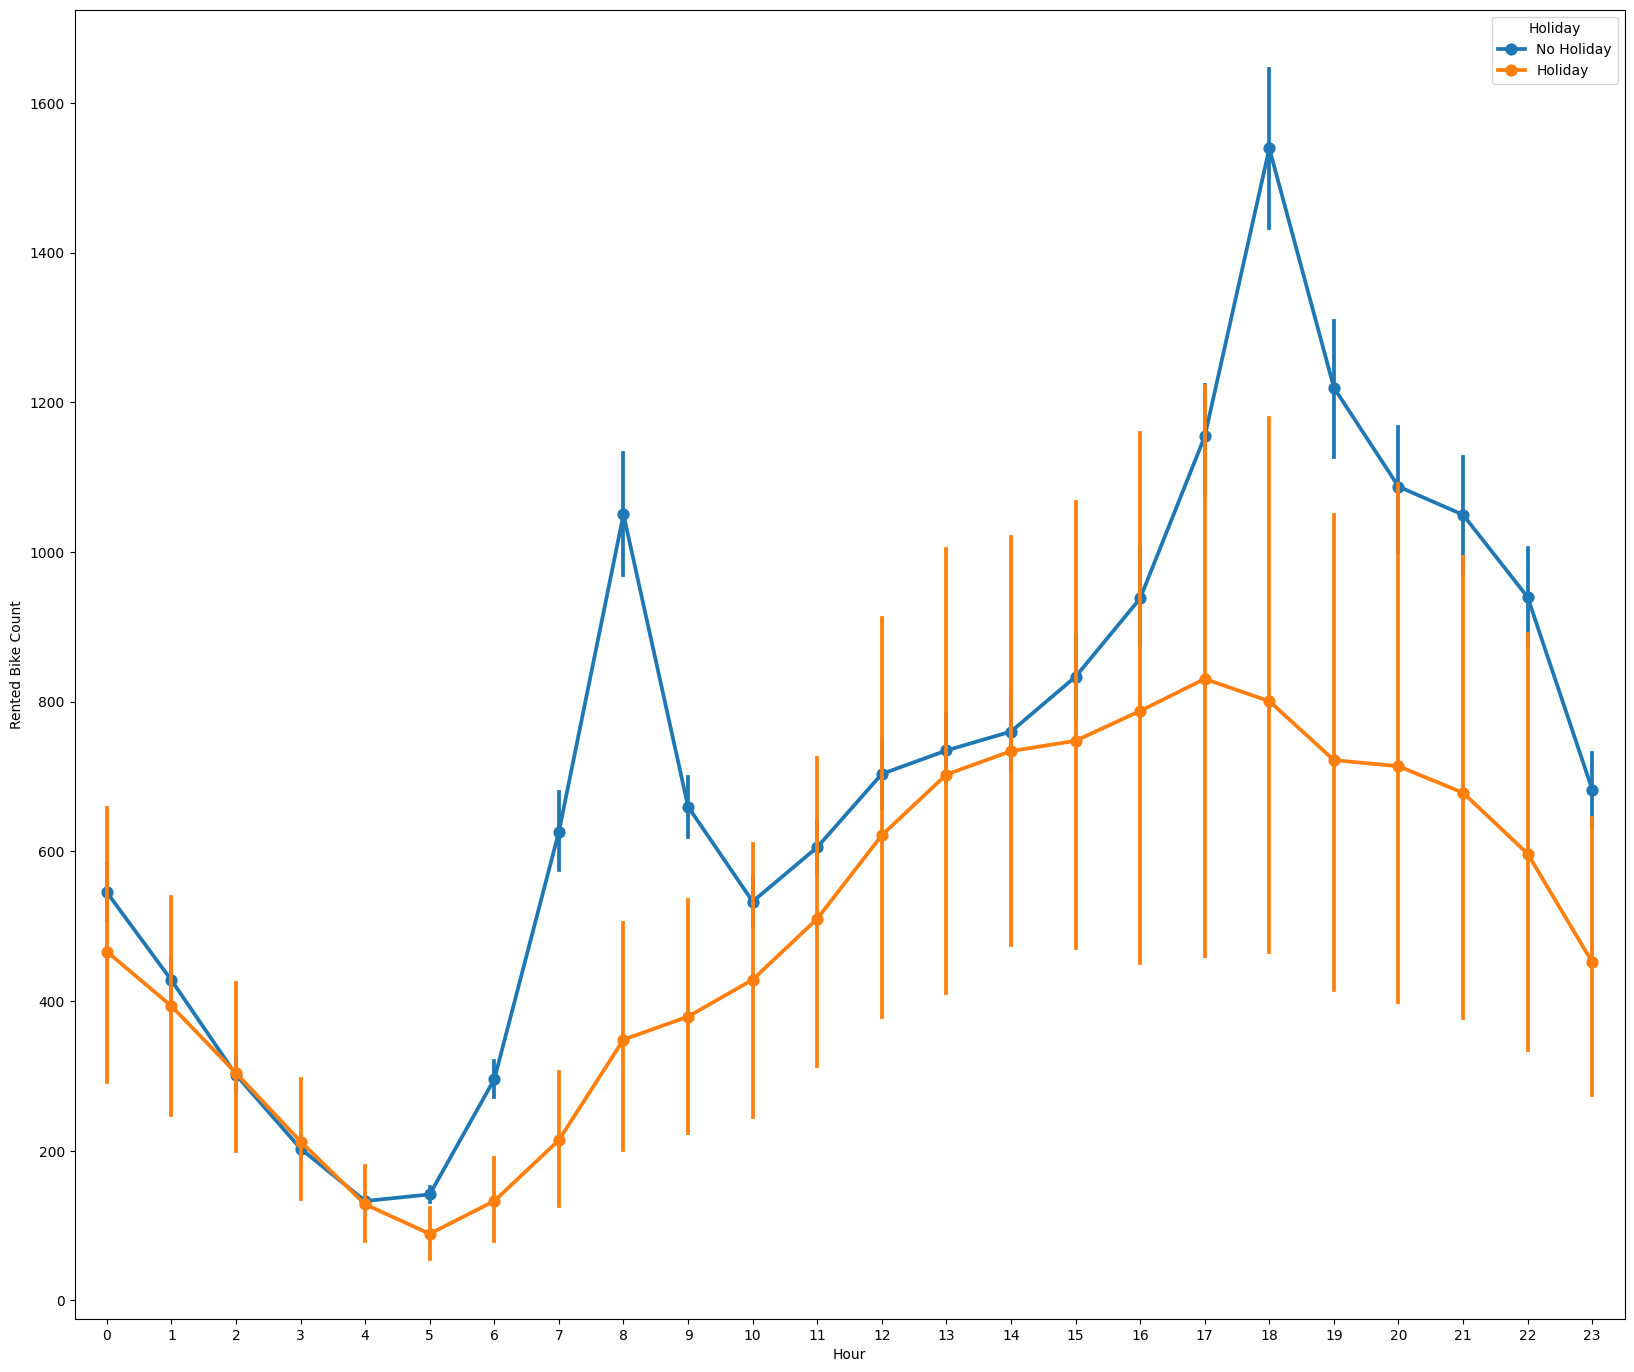

In [35]:
plt.figure(figsize=(20,17))
sns.pointplot(x = dataset['Hour'], y = dataset['Rented Bike Count'],  hue=dataset['Holiday'])

#### Insights:
##### The trend of bike counts for non holiday(regular day) is same as functioning day.
##### But on holidays it can be observed that the count gradually increases during the start of the day and keep continue to increase through out the day. It reaches the peak during the evening time at 5 'O clock and then gradually starts to decrease till the end of the day.

<Axes: xlabel='Hour', ylabel='Rented Bike Count'>

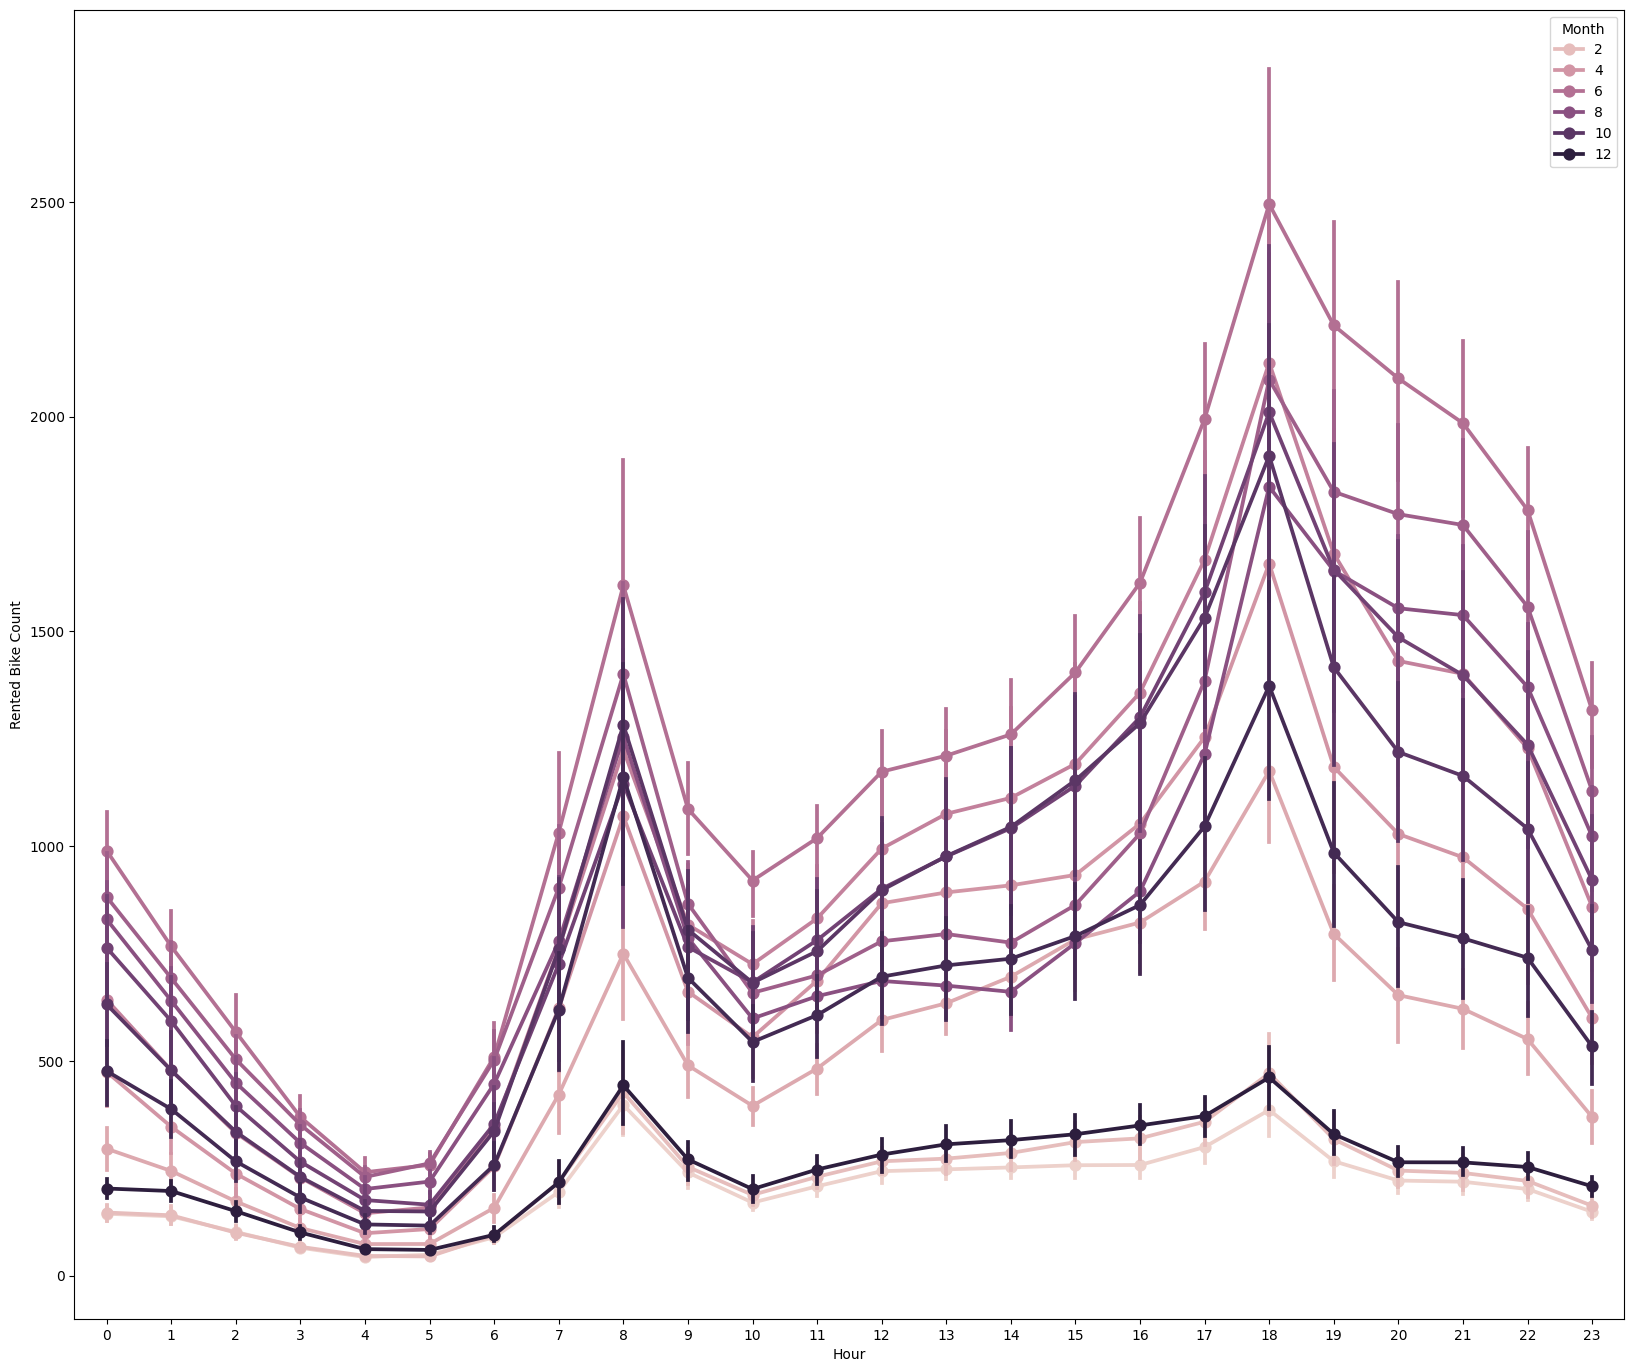

In [36]:

plt.figure(figsize=(20,17))
sns.pointplot(x = dataset['Hour'], y = dataset['Rented Bike Count'], hue= dataset['Month'])

### Data distribution

In [37]:
continuous_ftrs = dataset.describe().columns
continuous_ftrs

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Week Days', 'Day', 'Month', 'Year'],
      dtype='object')

<Figure size 1500x1500 with 0 Axes>

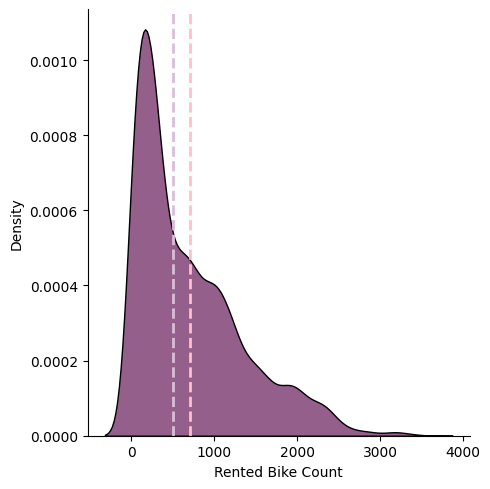

<Figure size 1500x1500 with 0 Axes>

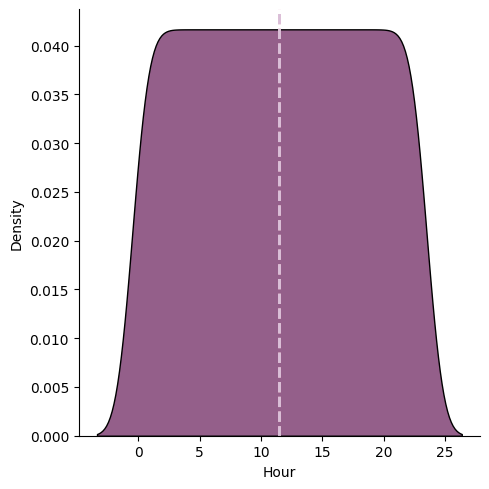

<Figure size 1500x1500 with 0 Axes>

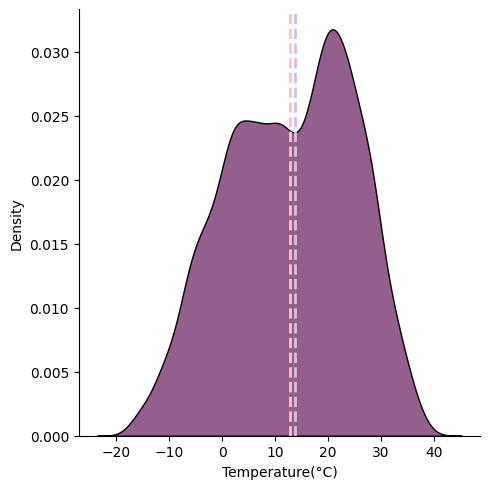

<Figure size 1500x1500 with 0 Axes>

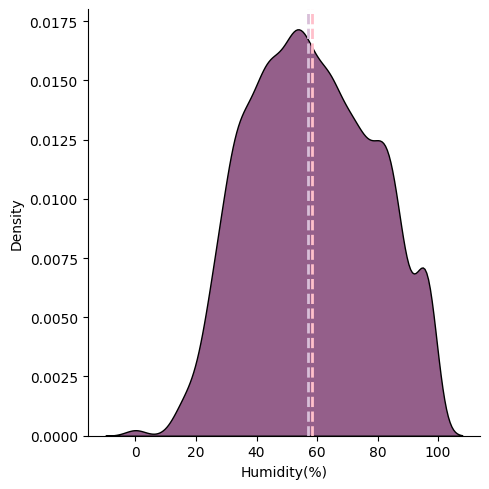

<Figure size 1500x1500 with 0 Axes>

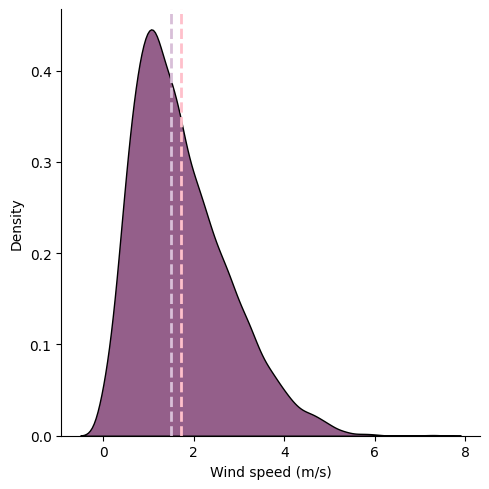

<Figure size 1500x1500 with 0 Axes>

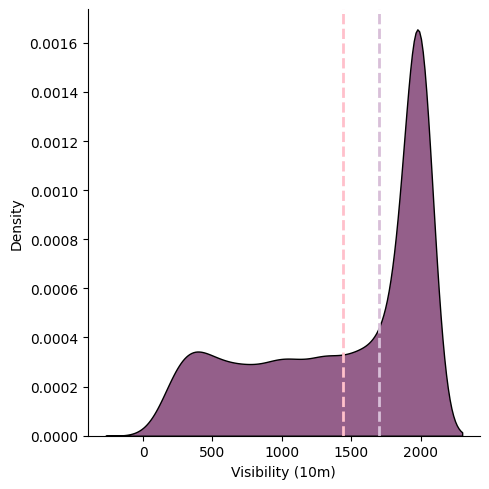

<Figure size 1500x1500 with 0 Axes>

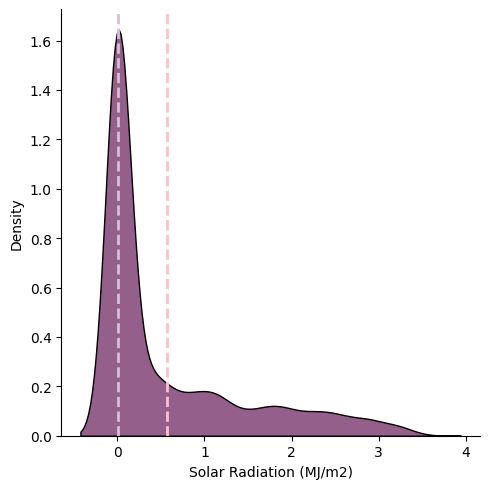

<Figure size 1500x1500 with 0 Axes>

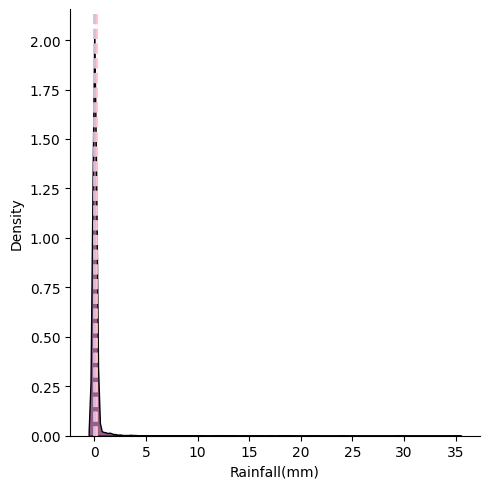

<Figure size 1500x1500 with 0 Axes>

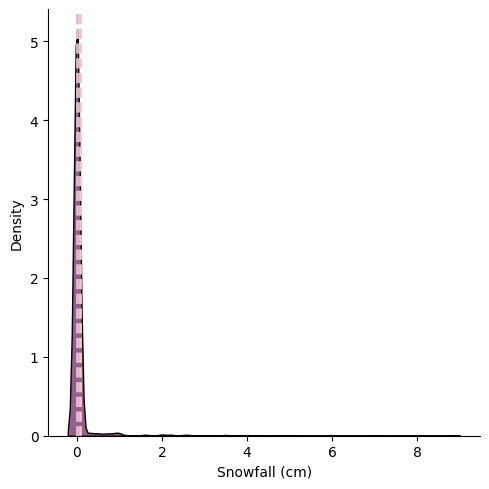

<Figure size 1500x1500 with 0 Axes>

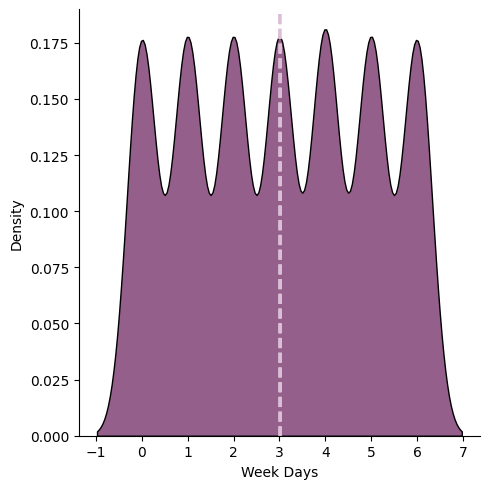

<Figure size 1500x1500 with 0 Axes>

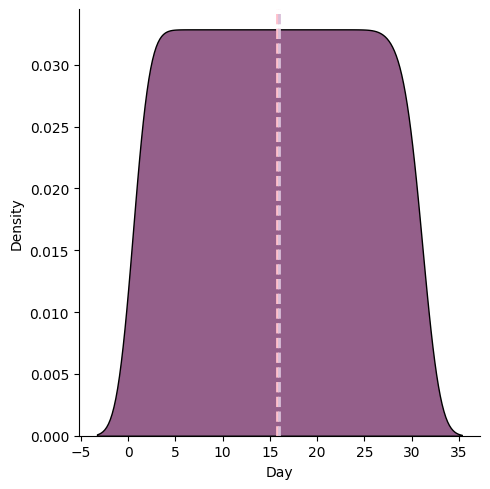

<Figure size 1500x1500 with 0 Axes>

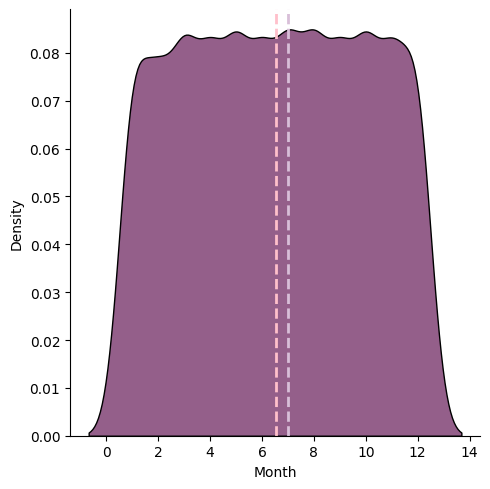

<Figure size 1500x1500 with 0 Axes>

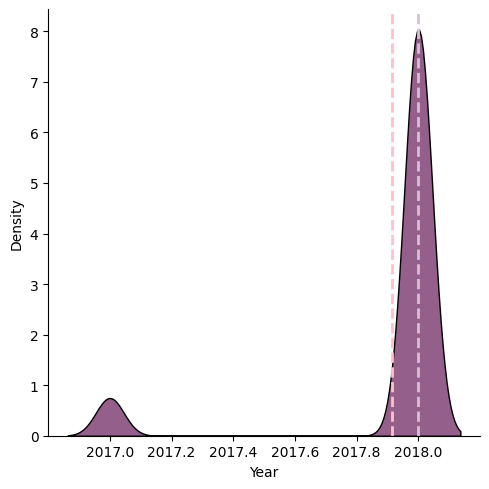

In [38]:
for i in continuous_ftrs:
    
    fig = plt.figure(figsize=(15,15))
    sns.displot(dataset[i], multiple = "stack",kind="kde", color='#702963')

    ax = plt.gca()
    ax.axvline(dataset[i].mean(), color = 'pink', linestyle = 'dashed', linewidth = 2)
    ax.axvline(dataset[i].median(), color = '#D8BFD8', linestyle = 'dashed', linewidth = 2)

    plt.show()
    

([<matplotlib.patches.Wedge at 0x22f878d2060>,
 [Text(0.6741841102813058, 0.869181100487237, 'Autumn'),
  Text(-0.9658645988140421, 0.5264081845467353, 'Spring'),
  Text(-0.0958501249153313, -1.0958160217635602, 'Summer'),
  Text(1.0663566130428606, -0.26996957943397826, 'Winter')],
 [Text(0.3677367874261668, 0.4740987820839474, '29.0%'),
  Text(-0.5268352357167502, 0.28713173702549194, '26.1%'),
  Text(-0.05228188631745343, -0.597717830052851, '37.0%'),
  Text(0.5816490616597421, -0.1472561342367154, '7.9%')])

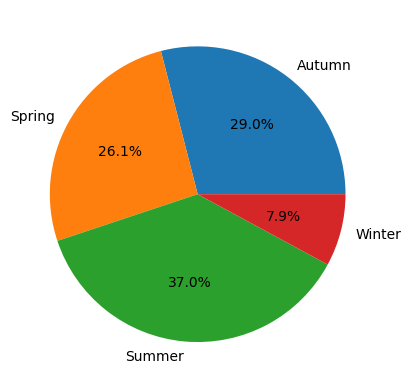

In [39]:
group_by_seasons = dataset.groupby('Seasons')

list_of_bikes_in_each_season = list(group_by_seasons['Rented Bike Count'].sum())
list_of_bikes_in_each_season

plt.pie(list_of_bikes_in_each_season,labels=group_by_seasons.groups, autopct='%1.1f%%')

### Convert Categorical feature into Numerical feature (One-hot encoding)

In [40]:
categorical_feature = ['Seasons, Holiday, Functioning Day, Week Days']

In [41]:
dataset['Holiday'].value_counts()

Holiday
No Holiday    8328
Holiday        432
Name: count, dtype: int64

In [42]:
dataset['Functioning Day'].value_counts()

Functioning Day
Yes    8465
No      295
Name: count, dtype: int64

In [43]:
dataset['Holiday'] = dataset['Holiday'].map({"No Holiday":0, "Holiday":1})
dataset['Functioning Day'] = dataset['Functioning Day'].map({"No":0, "Yes":1})

In [44]:
dataset_season = pd.get_dummies(dataset["Seasons"], drop_first = True)
dataset_weekdays = pd.get_dummies(dataset["Week Days"], drop_first = True)

In [45]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Seasons                  8760 non-null   object 
 10  Holiday                  8760 non-null   int64  
 11  Functioning Day          8760 non-null   int64  
 12  Week Days                8760 non-null   int32  
 13  Day                      8760 non-null   int32  
 14  Month                   

In [46]:
dataset = pd.concat([dataset,dataset_season],axis=1)

In [47]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Seasons                  8760 non-null   object 
 10  Holiday                  8760 non-null   int64  
 11  Functioning Day          8760 non-null   int64  
 12  Week Days                8760 non-null   int32  
 13  Day                      8760 non-null   int32  
 14  Month                   

In [48]:
dataset.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Week Days,Day,Month,Year,Spring,Summer,Winter
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,0,1,4,1,12,2017,False,False,True
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,0,1,4,1,12,2017,False,False,True
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,0,1,4,1,12,2017,False,False,True
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,0,1,4,1,12,2017,False,False,True
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,0,1,4,1,12,2017,False,False,True


In [49]:
dataset.drop(['Seasons'],axis=1, inplace=True)

In [50]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Holiday                  8760 non-null   int64  
 10  Functioning Day          8760 non-null   int64  
 11  Week Days                8760 non-null   int32  
 12  Day                      8760 non-null   int32  
 13  Month                    8760 non-null   int32  
 14  Year                    

In [51]:
dataset.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Week Days,Day,Month,Year,Spring,Summer,Winter
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,1,4,1,12,2017,False,False,True
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,1,4,1,12,2017,False,False,True
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,4,1,12,2017,False,False,True
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,1,4,1,12,2017,False,False,True
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,1,4,1,12,2017,False,False,True


In [52]:
dataset.to_csv('../data/processed/Preprocessed_Data.csv', index= False)